In [1]:
import re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from abydos.distance import Levenshtein
import seaborn as sns

In [2]:
# import the data
from Get_BNF_classes import BNF_mapping_counts

1472 BNF drugs mapped to DrugBank
68 BNF drugs unmapped


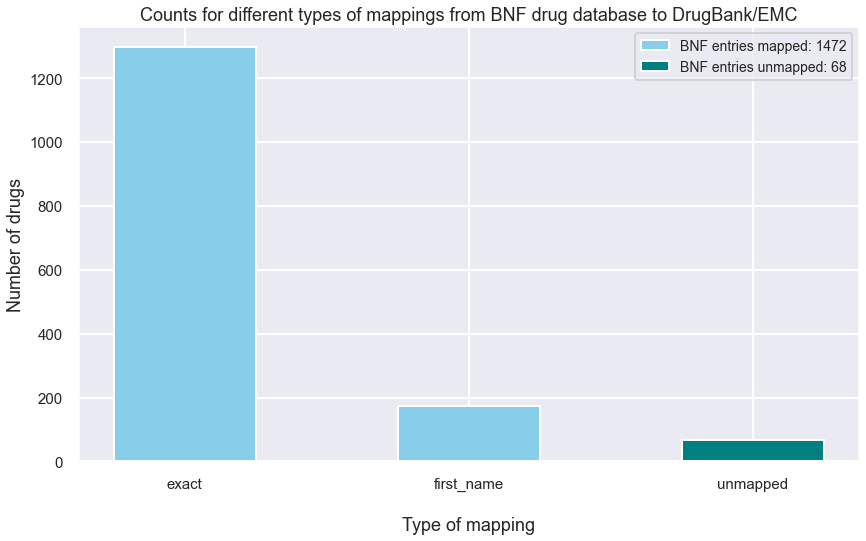

In [3]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
bar = plt.bar(x = BNF_mapping_counts.keys(), height = BNF_mapping_counts.values(), width = 0.5, color = ['skyblue', 'skyblue', 'teal'])
plt.title('Counts for different types of mappings from BNF drug database to DrugBank/EMC', fontsize=18)
plt.xlabel('\nType of mapping', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Number of drugs', fontsize=18)
plt.yticks(fontsize=15)
legend_text = ['BNF entries mapped: {}'.format(BNF_mapping_counts['exact'] + BNF_mapping_counts['first_name']),
               'BNF entries unmapped: {}'.format(BNF_mapping_counts['unmapped'])]
plt.legend(handles = [bar.patches[0], bar.patches[2]], labels = legend_text, fontsize = 14)
plt.savefig('figures/bnf_mappings')
plt.show()

In [4]:
from Map_survey_answers import mapping_counts

20849 survey answers mapped
3021 survey answers unmapped


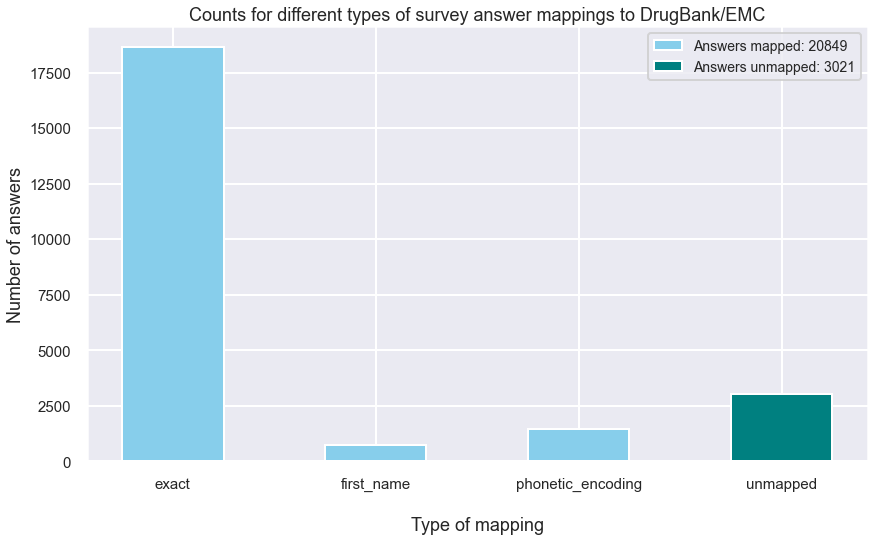

In [5]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
bar = plt.bar(x = mapping_counts.keys(), height = mapping_counts.values(), color = ['skyblue']*3 + ['teal'], width = 0.5)
plt.title('Counts for different types of survey answer mappings to DrugBank/EMC', fontsize=18)
plt.xlabel('\nType of mapping', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Number of answers', fontsize=18)
plt.yticks(fontsize=15)
legend_text = ['Answers mapped: {}'.format(mapping_counts['exact'] + mapping_counts['first_name'] + mapping_counts['phonetic_encoding']), 
              'Answers unmapped: {}'.format(mapping_counts['unmapped'])]
plt.legend(handles = [bar.patches[0], bar.patches[3]], labels = legend_text, fontsize = 14)
plt.savefig('figures/survey_mappings.png')
plt.show()